# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 26th, 2023 at 23:55. Hand in your files via DTU Learn. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [1]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.
* Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).

## A1 Part 2: Dataviz questions 

Have a look at the Data Viz intro lecture (Week 2), then answer the following questions in your own words. 

* What is the difference between data and metadata? How does that relate to the GPS tracks-example?
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.
  - Mention something that the human eye is very good at.
  - Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
* In your own words, explain the differnece between exploratory and explanatory data analysis.

Use at most 125 words per sub-question.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [9]:
import pandas as pd 
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px

path = r"C:\Users\micha\OneDrive\Pulpit\DTU\S4\02806_Social\week1\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv"
data = pd.read_csv(path)

In [8]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

values = pd.DataFrame(randomdata.items())
df = pd.DataFrame(randomdata.items(), columns=['District', 'value'])
print(df)

     District     value
0     CENTRAL  0.283805
1    SOUTHERN  0.888264
2     BAYVIEW  0.450599
3     MISSION  0.600090
4        PARK  0.636255
5    RICHMOND  0.337186
6   INGLESIDE  0.098767
7     TARAVAL  0.009436
8    NORTHERN  0.448849
9  TENDERLOIN  0.066167


In [24]:
choropleth_map_data = data.copy()
crime = 'VEHICLE THEFT'
day = 'Sunday'

map_data_sunday = choropleth_map_data.loc[choropleth_map_data['DayOfWeek'] == day]

map_data_crime = map_data_sunday.loc[map_data_sunday['Category'] == crime]

map_data_district = map_data_crime.groupby(['PdDistrict']).size().reset_index(name='crime_count')

# Find the index of the maximum and minimum value in the 'crime_count' column
max_index = map_data_district['crime_count'].idxmax()
min_index = map_data_district['crime_count'].idxmin()

# Retrieve the corresponding crime count value
max_crime_count = map_data_district.loc[max_index, 'crime_count']
min_crime_count = map_data_district.loc[min_index, 'crime_count']

district_with_max_crime = map_data_district.loc[max_index, 'PdDistrict']
district_with_min_crime = map_data_district.loc[min_index, 'PdDistrict']

print(f"District with the highest crime count: {district_with_max_crime} - {max_crime_count}")
print(f"District with the highest crime count: {district_with_min_crime} - {min_crime_count}")

District with the highest crime count: INGLESIDE - 2846
District with the highest crime count: TENDERLOIN - 356


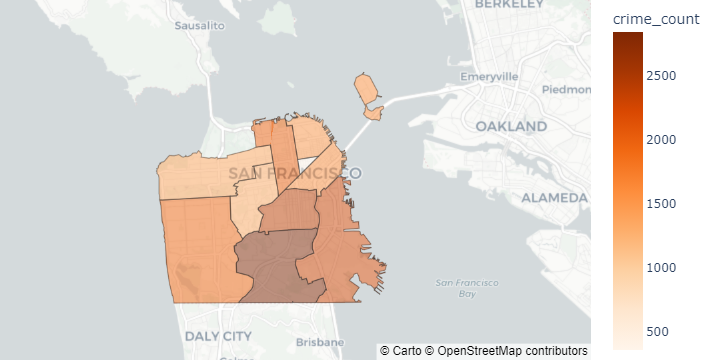

In [26]:
fig = px.choropleth_mapbox(map_data_district, geojson=counties, locations='PdDistrict', color='crime_count',
                           color_continuous_scale="Oranges",
                           range_color=(min_val, max_val),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.
* Did you find LLMs useful for anything in this exercise? Explain why/why not.

Use at most 125 words per sub-question.